In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([           
  transforms.Resize(224),                   
  transforms.ToTensor(),                     
  transforms.Normalize(                     
  mean=[0.485, 0.456, 0.406],               
  std=[0.229, 0.224, 0.225]                  
 )])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

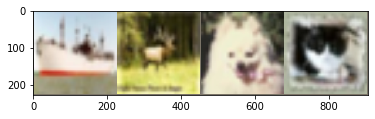

 ship  deer   dog   cat


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from torchvision import models
from torch import optim
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
#10 Class Number
model_ft.fc = nn.Linear(num_ftrs, 10)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr = 0.001, momentum = 0.9)

In [6]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        # forward + backward + optimize
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        optimizer_ft.zero_grad()
        loss.backward()
        optimizer_ft.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.151
[1,  4000] loss: 0.847
[1,  6000] loss: 0.697
[1,  8000] loss: 0.637
[1, 10000] loss: 0.572
[1, 12000] loss: 0.525
[2,  2000] loss: 0.421
[2,  4000] loss: 0.412
[2,  6000] loss: 0.402
[2,  8000] loss: 0.387
[2, 10000] loss: 0.372
[2, 12000] loss: 0.401
[3,  2000] loss: 0.264
[3,  4000] loss: 0.291
[3,  6000] loss: 0.292
[3,  8000] loss: 0.280
[3, 10000] loss: 0.308
[3, 12000] loss: 0.271
[4,  2000] loss: 0.199
[4,  4000] loss: 0.218
[4,  6000] loss: 0.197
[4,  8000] loss: 0.210
[4, 10000] loss: 0.215
[4, 12000] loss: 0.203
[5,  2000] loss: 0.137
[5,  4000] loss: 0.141
[5,  6000] loss: 0.154
[5,  8000] loss: 0.161
[5, 10000] loss: 0.163
[5, 12000] loss: 0.172
Finished Training


In [0]:
PATH = './resnet18_ft.pth'
torch.save(model_ft.state_dict(), PATH)

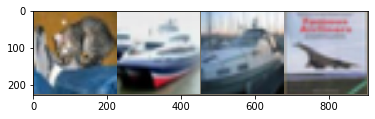

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

model_ft.load_state_dict(torch.load(PATH))
images = images.to(device)
labels = labels.to(device)
outputs = model_ft(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 98 %
Accuracy of   car : 96 %
Accuracy of  bird : 85 %
Accuracy of   cat : 89 %
Accuracy of  deer : 93 %
Accuracy of   dog : 76 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %
